# get cgenes

07/20/2020

modified 12/10/2020

In [1]:
import os, glob
import pybedtools
import subprocess
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
save_dir = 'D_mpraanalyze_barcode_allelic/cgene'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [3]:
snp_list_file = '../../psych_lib_info.csv'
snp_list_df = pd.read_csv(snp_list_file,index_col=0)
snp_list_bed_df = snp_list_df[['Chr','Position','name']]
snp_list_bed_df.columns = ['chr', 'start', 'name']
snp_list_bed_df['stop'] = snp_list_bed_df.start + 1
snp_list_bed_df  = snp_list_bed_df[['chr','start', 'stop','name']]
print(snp_list_bed_df.shape)
snp_list_bed_df[:5]
snp_list_bed = pybedtools.BedTool.from_dataframe(snp_list_bed_df).sort()

(4440, 4)


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (63,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
anchors_dir = '/Users/mguo123/Documents/pan_omics_psych/data/interim/merged/anchors_bed_sort/'
os.listdir(anchors_dir)

['SL_D2_sort.bed',
 'SLC_D2_sort.bed',
 'H9_D28_sort.bed',
 'H9_D10_sort.bed',
 'H9_D2_sort.bed',
 'Astrocytes_sort.bed',
 'SL_D0_sort.bed',
 'SLC_D0_sort.bed',
 'H9_D0_sort.bed']

In [5]:
loop_dir = '/Users/mguo123/Documents/pan_omics_psych/data/interim/merged/loops'
os.listdir(loop_dir)
def make_loop_df(loop_file):
    """
    from hichip_df make hichip df that's bidirectionary target <-> source


    Arguments
        loop_file : <str> like '../data/interim/merged/loops/GDSD3.loops.csv'

    return: loop_df_bi <DataFrame> with colummns ['target','source','count']

    """
    # loop_file = '../data/interim/merged/loops/GDSD3.loops.csv'
    loop_df = pd.read_csv(loop_file,index_col=0)
    loop_df_rev = loop_df.copy()
    loop_df_rev.columns = ['target','source','count']
    loop_df_bi = pd.concat([loop_df, loop_df_rev],sort=False)
    return loop_df_bi

In [7]:
save_prefix = 'D_mpraanalyze_barcode_allelic/cgenes_'

In [8]:
glob.glob('D_mpraanalyze_barcode_allelic/mpraanalyze*comp_filt.csv')

['D_mpraanalyze_barcode_allelic/mpraanalyze_SL_comp_filt.csv',
 'D_mpraanalyze_barcode_allelic/mpraanalyze_H9D2_comp_filt.csv',
 'D_mpraanalyze_barcode_allelic/mpraanalyze_H9D10_comp_filt.csv',
 'D_mpraanalyze_barcode_allelic/mpraanalyze_HEK293_comp_filt.csv',
 'D_mpraanalyze_barcode_allelic/mpraanalyze_AST1_comp_filt.csv',
 'D_mpraanalyze_barcode_allelic/mpraanalyze_H9D4_comp_filt.csv',
 'D_mpraanalyze_barcode_allelic/mpraanalyze_H9D0_comp_filt.csv',
 'D_mpraanalyze_barcode_allelic/mpraanalyze_SLC_comp_filt.csv']

In [9]:
tissue_mapping = {'Astrocytes':'AST1',
    'H9_D0':'H9D0','H9_D2':'H9D2','H9_D4':'H9D4','H9_D10':'H9D10',
    'SL':'SL','SLC':'SLC'
}

### annotate tissue anchors with snps

In [10]:
for file in os.listdir(anchors_dir):
    tissue = file.split('_sort')[0]
    output_bedfile = os.path.join(save_dir, tissue + '_snp_anchor_annon.bed')
    print(tissue, output_bedfile)
    db_bed = pybedtools.BedTool(os.path.join(anchors_dir, tissue+'_sort.bed'))
    output_bed = snp_list_bed.intersect(db_bed, wo=True, sorted=True, names='db')
    output_bed.saveas(output_bedfile)
    output_bed.to_dataframe()

SL_D2 D_mpraanalyze_barcode_allelic/cgene/SL_D2_snp_anchor_annon.bed
SLC_D2 D_mpraanalyze_barcode_allelic/cgene/SLC_D2_snp_anchor_annon.bed
H9_D28 D_mpraanalyze_barcode_allelic/cgene/H9_D28_snp_anchor_annon.bed
H9_D10 D_mpraanalyze_barcode_allelic/cgene/H9_D10_snp_anchor_annon.bed
H9_D2 D_mpraanalyze_barcode_allelic/cgene/H9_D2_snp_anchor_annon.bed
Astrocytes D_mpraanalyze_barcode_allelic/cgene/Astrocytes_snp_anchor_annon.bed
SL_D0 D_mpraanalyze_barcode_allelic/cgene/SL_D0_snp_anchor_annon.bed
SLC_D0 D_mpraanalyze_barcode_allelic/cgene/SLC_D0_snp_anchor_annon.bed
H9_D0 D_mpraanalyze_barcode_allelic/cgene/H9_D0_snp_anchor_annon.bed


# 1. closer look at egenes

In [11]:
tissue = 'AST1'
mpraanalyze_file = 'mpraanalyze_'+tissue+'_comp_filt.csv'
mpra_df = pd.read_csv(mpraanalyze_file,index_col=0)
mpra_df.shape

(133, 151)

Text(0.5, 1.0, 'Fraction coming from each disease: AST1')

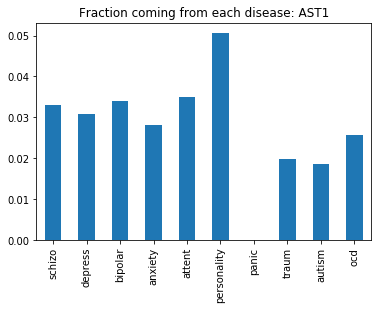

In [12]:
fig = plt.figure()
pd.Series(mpra_df[['schizo',
       'depress', 'bipolar', 'anxiety', 'attent', 'personality', 'panic',
       'traum', 'autism', 'ocd']].sum(axis=0)/snp_list_df[['schizo',
       'depress', 'bipolar', 'anxiety', 'attent', 'personality', 'panic',
       'traum', 'autism', 'ocd']].sum(axis=0)).plot.bar()
plt.title('Fraction coming from each disease: '+tissue)

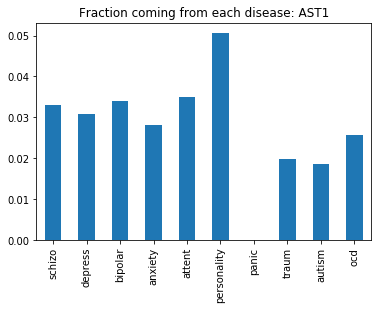

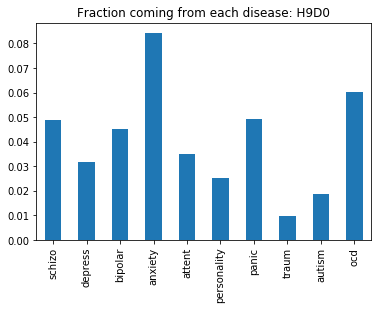

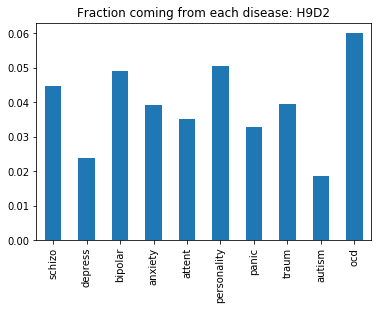

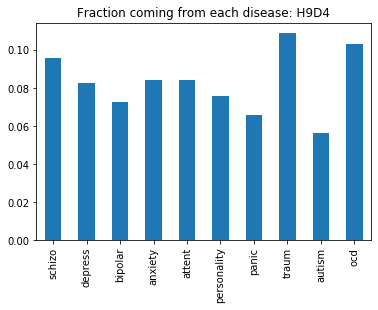

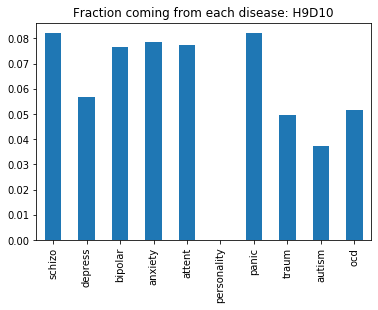

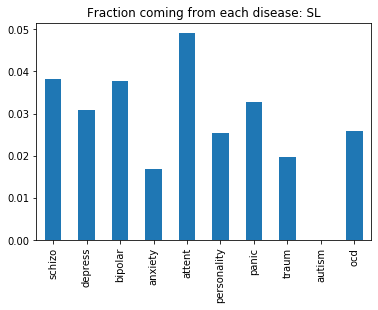

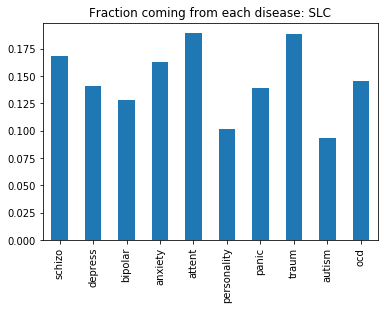

In [14]:
tissue_egene = {}
gene_df_all = pd.DataFrame()
for tissue in tissue_mapping.values():
    mpraanalyze_file = 'D_mpraanalyze_barcode_allelic/mpraanalyze_'+tissue+'_comp_filt.csv'
    mpra_df = pd.read_csv(mpraanalyze_file,index_col=0)
    gene_df = pd.DataFrame({'gene':mpra_df.GeneName.dropna().unique()})
    gene_df['tissue'] = tissue
    gene_df['present'] = 1
    gene_df_all = pd.concat([gene_df_all, gene_df],axis=0)
    fig = plt.figure()
    pd.Series(mpra_df[['schizo',
           'depress', 'bipolar', 'anxiety', 'attent', 'personality', 'panic',
           'traum', 'autism', 'ocd']].sum(axis=0)/snp_list_df[['schizo',
           'depress', 'bipolar', 'anxiety', 'attent', 'personality', 'panic',
           'traum', 'autism', 'ocd']].sum(axis=0)).plot.bar()
    plt.title('Fraction coming from each disease: '+tissue)

In [15]:
gene_df_all.pivot('gene','tissue','present').fillna(0).to_csv('egene_by_tissue_mat.csv')

In [16]:
dict(mpra_df.corr().loc['fdr',][mpra_df.corr().loc['fdr',]>.2])

{'pval': 0.9848479964495822,
 'fdr': 1.0,
 'motifEScoreChng': 0.7944829031217108,
 'cDNApos': 0.3299115648773254,
 'CDSpos': 0.3368035285532249,
 'protPos': 0.33693043228399966,
 'Dst2Splice': 0.2915213911222686,
 'GerpRSpval': 0.28689859938041135,
 'dbscSNV.ada_score': 0.9999999999999998}

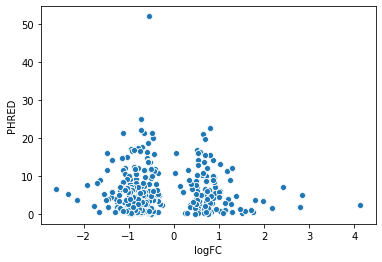

In [17]:
sns.scatterplot(data = mpra_df, x= 'logFC', y='PHRED')

# 2. create snp - to anchor gene link

In [18]:
glob.glob('/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/*')

['/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_H9_D2_annon.bed',
 '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_Astrocytes_annon.bed',
 '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_H9_D10_annon.bed',
 '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_H9_D28_annon.bed',
 '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_SLC_D0_annon.bed',
 '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_SL_D0_annon.bed',
 '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_H9_D0_annon.bed',
 '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_SLC_D2_annon.bed',
 '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_SL_D2_annon.bed']

In [47]:
tissues = []
for anchor_promoter_file in sorted(glob.glob('/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/*')):
    tissue = os.path.basename(anchor_promoter_file).split('promoter_')[-1].split('_annon')[0]
    print(tissue)
    tissues.append(tissue)

Astrocytes
H9_D0
H9_D10
H9_D28
H9_D2
SLC_D0
SLC_D2
SL_D0
SL_D2


#### example

In [19]:
anchor_promoter_file = '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_H9_D2_annon.bed'
tissue = os.path.basename(anchor_promoter_file).split('promoter_')[-1].split('_annon')[0]
anchor_promoter_annon_df =  pybedtools.BedTool(anchor_promoter_file).to_dataframe()
anchor_promoter_annon_df.columns = ['chr_p','start_p','stop_p','TSS','chr_f','start_f','stop_f','anchor','overlap']

anchor_annon_df_filt = anchor_promoter_annon_df.sort_values('overlap', ascending=False).drop_duplicates(['TSS','anchor']).sort_index()
anchor_annon_df_filt = anchor_annon_df_filt[['anchor','TSS']]

In [20]:
snp_annon_file = os.path.join(save_dir,tissue + '_snp_anchor_annon.bed')
snp_annon_df =  pybedtools.BedTool(snp_annon_file).to_dataframe()
snp_annon_df = snp_annon_df[['thickEnd', 'name']]
snp_annon_df.columns = ['p_loc', 'name']

In [21]:
snp_df_anchor = snp_annon_df.merge(anchor_annon_df_filt,how='inner', left_on='p_loc',right_on='anchor')
# snp_df_anchor = get_foot_counts(snp_df_anchor)

In [22]:
# snp_df_anchor.groupby('snpname').agg()

In [23]:
loop_file = os.path.join(loop_dir, tissue+'.loops.csv')
# read in loops, then "annotate" the source TSS regions the loop anchors
loop_df_bi = make_loop_df(loop_file)
loop_df_bi = loop_df_bi.merge(anchor_annon_df_filt,how='inner',left_on='source',right_on='anchor' )


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [24]:
# get footprints of the "annotated-with-TSS" looped regions, then make the counts DataFrame
snp_df_loop = snp_annon_df.merge(loop_df_bi,how='inner', left_on='p_loc',right_on='target')
# foot_count_loop = get_foot_counts(foot_df_loop)


In [42]:
snp_anchor_info = snp_df_anchor.groupby('name').agg({'TSS':[lambda x: '|'.join(x), 'count']})
snp_anchor_info.columns = ['cgenes_anchor', 'cgene_count_anchor']
snp_anchor_info.reset_index(inplace=True)
snp_loop_info = snp_df_loop.groupby('name').agg({'TSS':[lambda x: '|'.join(x), 'count']})
snp_loop_info.columns = ['cgenes_loop', 'cgene_count_loop']
snp_loop_info.reset_index(inplace=True)
snp_info_tissue = snp_anchor_info.merge(snp_loop_info, how='outer',on='name')
snp_info_tissue.cgenes_anchor.fillna('',inplace=True)
snp_info_tissue.cgene_count_anchor.fillna(0,inplace=True)
snp_info_tissue.cgenes_loop.fillna('',inplace=True)
snp_info_tissue.cgene_count_loop.fillna(0,inplace=True)
snp_info_tissue

,name,cgenes_anchor,cgene_count_anchor,cgenes_loop,cgene_count_loop
0,chr1.11712109.Ref.C,FBXO2|FBXO6,2.0,UBE4B|APITD1|APITD1-CORT|APITD1|APITD1-CORT|CO...,60
1,chr1.11712109.all_alt.T,FBXO2|FBXO6,2.0,UBE4B|APITD1|APITD1-CORT|APITD1|APITD1-CORT|CO...,60
2,chr1.11850365.Ref.T,CLCN6|MTHFR,2.0,UBE4B|C1orf127|MASP2|SRM|EXOSC10|ANGPTL7|MTOR|...,51
3,chr1.11850365.all_alt.G,CLCN6|MTHFR,2.0,UBE4B|C1orf127|MASP2|SRM|EXOSC10|ANGPTL7|MTOR|...,51
4,chr1.11850927.Ref.C,CLCN6|MTHFR,2.0,UBE4B|C1orf127|MASP2|SRM|EXOSC10|ANGPTL7|MTOR|...,51
...,...,...,...,...,...
3805,chr9.82310898.all_alt.A,,0.0,GNAQ|GNAQ|CEP78|CEP78|PSAT1|TLE4|TLE4,7
3806,chr9.94251806.Ref.G,,0.0,DIRAS2|SYK|AUH|NFIL3|NFIL3|ROR2|SPTLC1|IARS|IA...,25
3807,chr9.94251806.all_alt.A,,0.0,DIRAS2|SYK|AUH|NFIL3|NFIL3|ROR2|SPTLC1|IARS|IA...,25
3808,chr9.94877836.Ref.A,,0.0,AUH|NFIL3|ROR2|SPTLC1|IARS|IARS|CENPP|NOL8|OGN...,18


In [43]:
snp_info_tissue.describe()

,cgene_count_anchor,cgene_count_loop
count,3810.000000,3810.000000
mean,0.267717,39.601575
std,0.620582,42.729433
min,0.000000,1.000000
25%,0.000000,13.000000
50%,0.000000,24.000000
75%,0.000000,47.000000
max,5.000000,293.000000


# run all cgenes

In [49]:
def get_cgenes(tissue):
    print(tissue)
    anchor_promoter_file = '/Users/mguo123/Documents/pan_omics_psych/data/interim/annon/promoter_anchors/promoter_'+tissue + '_annon.bed'
    anchor_promoter_annon_df =  pybedtools.BedTool(anchor_promoter_file).to_dataframe()
    anchor_promoter_annon_df.columns = ['chr_p','start_p','stop_p','TSS','chr_f','start_f','stop_f','anchor','overlap']

    anchor_annon_df_filt = anchor_promoter_annon_df.sort_values('overlap', ascending=False).drop_duplicates(['TSS','anchor']).sort_index()
    anchor_annon_df_filt = anchor_annon_df_filt[['anchor','TSS']]
    
    
    snp_annon_file = os.path.join(save_dir,tissue + '_snp_anchor_annon.bed')
    snp_annon_df =  pybedtools.BedTool(snp_annon_file).to_dataframe()
    snp_annon_df = snp_annon_df[['thickEnd', 'name']]
    snp_annon_df.columns = ['p_loc', 'name']
    
    snp_df_anchor = snp_annon_df.merge(anchor_annon_df_filt,how='inner', left_on='p_loc',right_on='anchor')
    
    
    loop_file = os.path.join(loop_dir, tissue+'.loops.csv')
    # read in loops, then "annotate" the source TSS regions the loop anchors
    loop_df_bi = make_loop_df(loop_file)
    loop_df_bi = loop_df_bi.merge(anchor_annon_df_filt,how='inner',left_on='source',right_on='anchor' )

    snp_df_loop = snp_annon_df.merge(loop_df_bi,how='inner', left_on='p_loc',right_on='target')

    snp_anchor_info = snp_df_anchor.groupby('name').agg({'TSS':[lambda x: '|'.join(x), 'count']})
    snp_anchor_info.columns = ['cgenes_anchor', 'cgene_count_anchor']
    snp_anchor_info.reset_index(inplace=True)
    snp_loop_info = snp_df_loop.groupby('name').agg({'TSS':[lambda x: '|'.join(x), 'count']})
    snp_loop_info.columns = ['cgenes_loop', 'cgene_count_loop']
    snp_loop_info.reset_index(inplace=True)
    snp_info_tissue = snp_anchor_info.merge(snp_loop_info, how='outer',on='name')
    snp_info_tissue.cgenes_anchor.fillna('',inplace=True)
    snp_info_tissue.cgene_count_anchor.fillna(0,inplace=True)
    snp_info_tissue.cgenes_loop.fillna('',inplace=True)
    snp_info_tissue.cgene_count_loop.fillna(0,inplace=True)
    snp_info_tissue.to_csv(os.path.join(save_dir, tissue+'_snp_cgene_info.csv'))

In [48]:
save_dir

'D_mpraanalyze_barcode_allelic/cgene'

In [50]:
for tissue in tissues: 
    get_cgenes(tissue)

Astrocytes


/Users/mguo123/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


H9_D0
H9_D10
H9_D28
H9_D2
SLC_D0
SLC_D2
SL_D0
SL_D2


In [26]:
# mpraanalyze_file = 'D_mpraanalyze_barcode_allelic/mpraanalyze_'+tissue_mapping[tissue]+'_comp_filt.csv'
# mpra_df = pd.read_csv(mpraanalyze_file,index_col=0)
# mpra_df.shape

(174, 151)

In [27]:
# cgene_anchors =sorted(snp_df_anchor[snp_df_anchor.name.isin(mpra_df.name)].TSS.unique())

In [28]:
# len(cgene_anchors)

13

In [29]:
# cgene_anchors

['DEF8',
 'EPHX2',
 'ERBB2',
 'FABP6',
 'FAM213A',
 'HLA-B',
 'NSRP1',
 'NT5C2',
 'ODF3B',
 'PML',
 'SHANK2',
 'STOML1',
 'TYMP']

In [30]:
cgene_loops = sorted(snp_df_loop[snp_df_loop.name.isin(mpra_df.name)].TSS.unique())

In [31]:
len(cgene_loops)

1497